# Filtering Scatterplot

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import corc.our_datasets
import corc.graph_metrics.neb
import os
import pickle
import corc.utils

cache_path = "../../cache"

In [5]:
def get_tNEB(dataset_name, cache_path):
    filename = os.path.join(cache_path, f"{dataset_name}_TMM-NEB.pickle")
    if os.path.exists(filename):
        with open(filename, "rb") as f:
            tmms = pickle.load(f)
    else:
        print("pickle not found!")
    return tmms


In [95]:
import matplotlib.pyplot as plt
import numpy as np

import corc.mixture

# Create lists to store the elongations and counts for each dataset
elongations = []
counts = []
datasets = []

# for dataset in ["densired_soft_8"]:
for dataset in corc.our_datasets.CORE_HD_DATASETS:
    tmms = get_tNEB(dataset, cache_path)
    X,y,_ = corc.utils.load_dataset(dataset)
    for tmm in tmms:
        # mixture_model = tmm.old_mixture_model
        mixture_model = corc.mixture.StudentMixture.from_EMStudentMixture(tmm.old_mixture_model)
        elongation = mixture_model.get_elongations()
        count = mixture_model.get_counts(X)
        elongations.extend(elongation)
        counts.extend(count)
        datasets.extend([dataset] * len(elongation))


In [98]:
np.sum(np.array(elongations) >100000)

167

In [92]:
len(counts)

250

In [88]:
412/2800

0.14714285714285713

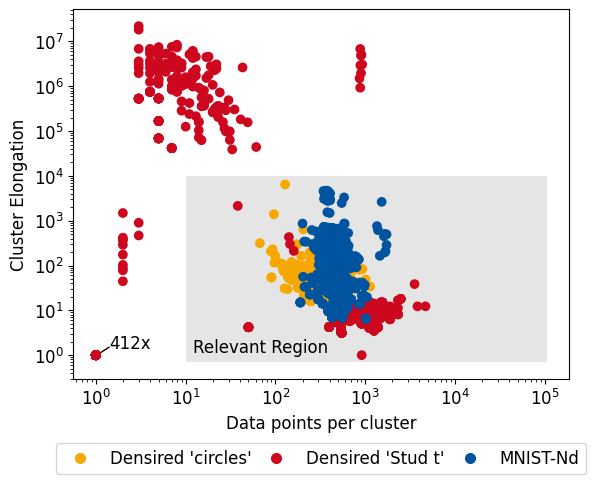

In [ ]:
from matplotlib.lines import Line2D
# Map dataset names to colors
colors = []
for dataset in datasets:
    if dataset.startswith('densired_soft'):
        colors.append(corc.visualization.COLOR_DICT['red'])
    elif dataset.startswith('densired'):
        colors.append(corc.visualization.COLOR_DICT['orange'])
    elif dataset.startswith('mnist'):
        colors.append(corc.visualization.COLOR_DICT['blue'])

plt.rcParams.update({
    'font.size': 12
})
# Create scatter plot
plt.scatter(counts, elongations, c=colors, alpha=1)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Data points per cluster')
plt.ylabel('Cluster Elongation')

rect = plt.Rectangle((10, 0.7), max(counts) - min(counts)+100000, 10000, facecolor='#cccccc', alpha=0.5, zorder=0)
plt.gca().add_patch(rect)
plt.text(12, 1.5, 'Relevant Region', ha='left', va='center')
plt.text(1.4, 1.8, '412x', ha='left', va='center')
plt.plot([1.1, 1.4], [1.1, 1.5], color='black', lw=1, zorder=0)
# plt.plot([10, 1010], [5000, 5000], linewidth=2)
# Create legend
legend_markersize = 9
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label="Densired 'circles'", markerfacecolor=corc.visualization.COLOR_DICT['orange'], markersize=legend_markersize),
    Line2D([0], [0], marker='o', color='w', label="Densired 'Stud t'", markerfacecolor=corc.visualization.COLOR_DICT['red'], markersize=legend_markersize),
    Line2D([0], [0], marker='o', color='w', label='MNIST-Nd', markerfacecolor=corc.visualization.COLOR_DICT['blue'], markersize=legend_markersize)
]
plt.legend(handles=legend_elements, loc='upper center',ncol=3, bbox_to_anchor=(0.5, -0.15), columnspacing=0.5, labelspacing=0.2)
plt.savefig("../../figures/filtering_scatterplot.pdf", bbox_inches='tight')
plt.show()